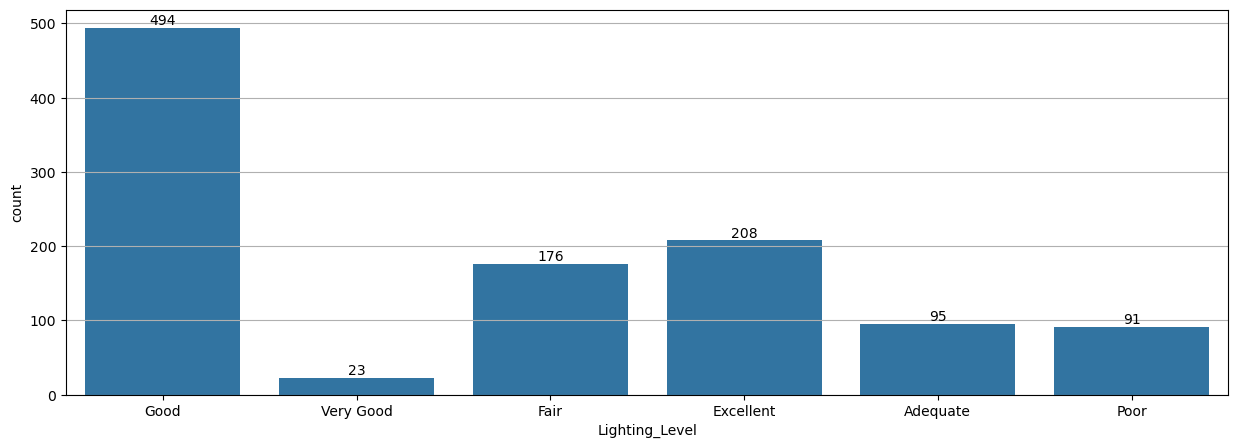

Accuracy: 0.6490984743411928


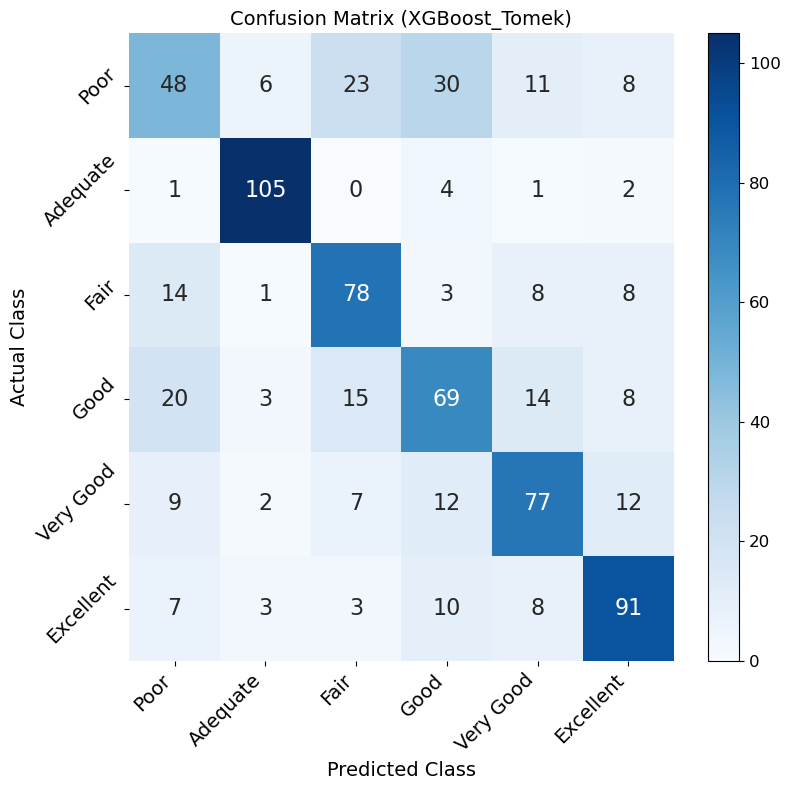

In [3]:
import pandas as pd
import numpy as np         
import matplotlib.pyplot as plt   
import seaborn as sns  
from xgboost import XGBClassifier 
import xgboost as xgb
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import TomekLinks
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.combine import SMOTETomek

# Read the CSV file into a DataFrame
df = pd.read_csv("IUBAT_Testing7.csv")

# Visualize the distribution of 'PMV_Level' column
plt.figure(figsize=(15,5))
plt.grid()
ax = sns.countplot(data=df, x='Lighting_Level')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

# Preprocess categorical variables
df.columns = df.columns.str.strip()
df["Gender"] = pd.factorize(df['Gender'])[0].astype(np.uint8)
df["Room_Orientation"] = pd.factorize(df['Room_Orientation'])[0].astype(np.uint8)
df["Lighting_Level"] = pd.factorize(df['Lighting_Level'])[0].astype(np.uint8)
df["Age"] = pd.factorize(df['Age'])[0].astype(np.uint8)
df["Distan_Windows"] = pd.factorize(df['Distan_Windows'])[0].astype(np.uint8)
df["PMV_Level"] = pd.factorize(df['PMV_Level'])[0].astype(np.uint8)

# Define class names
class_names = ['Excellent', 'Very Good', 'Good', 'Fair', 'Adequate', 'Poor',]

# Separate input features and target variable
inputs = df.drop(['Lighting_Level'], axis=1)
target = df['Lighting_Level']

# Balance the dataset using SMOTEENN
resample = SMOTETomek(random_state=0)
X, y = resample.fit_resample(inputs, target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)

# Create and train the Random Forest Classifier model
rfc = XGBClassifier()
rfc.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names[::-1], yticklabels=class_names[::-1], annot_kws={"fontsize": 14})

# Increase font size for annotations
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=14, rotation=45)  # Rotate y-axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=14, rotation=45, ha='right')  # Rotate x-axis labels and align them to the right

plt.title('Confusion Matrix (XGBoost_Tomek)', fontsize=14)  # Increase title font size
plt.xlabel('Predicted Class', fontsize=14)  # Increase x-axis label font size
plt.ylabel('Actual Class', fontsize=14)  # Increase y-axis label font size

# Increase font size for the values inside each class
for text in heatmap.texts:
    text.set_fontsize(16)

# Remove the duplicate colorbar
plt.gcf().get_axes()[1].remove()

# Create a separate colorbar figure and adjust its position
cbar = plt.colorbar(heatmap.collections[0])
cbar.ax.tick_params(labelsize=12)  # Increase colorbar tick font size

plt.tight_layout()
plt.show()

In [4]:
from sklearn.metrics import classification_report

# ...

# Evaluate the model on the testing set
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix in text form
print("Confusion Matrix:")
print(cm)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

Accuracy: 0.6490984743411928
Confusion Matrix:
[[ 48   6  23  30  11   8]
 [  1 105   0   4   1   2]
 [ 14   1  78   3   8   8]
 [ 20   3  15  69  14   8]
 [  9   2   7  12  77  12]
 [  7   3   3  10   8  91]]
Classification Report:
              precision    recall  f1-score   support

   Excellent       0.48      0.38      0.43       126
   Very Good       0.88      0.93      0.90       113
        Good       0.62      0.70      0.66       112
        Fair       0.54      0.53      0.54       129
    Adequate       0.65      0.65      0.65       119
        Poor       0.71      0.75      0.73       122

    accuracy                           0.65       721
   macro avg       0.65      0.66      0.65       721
weighted avg       0.64      0.65      0.64       721

